1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
import math
from pylab import imshow
from scipy.integrate import odeint
from matplotlib.colors import LogNorm
from scipy import fftpack

(50,)
[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
(50,)
[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   

Text(0.5, 0.92, 'Six-hump Camelback function')

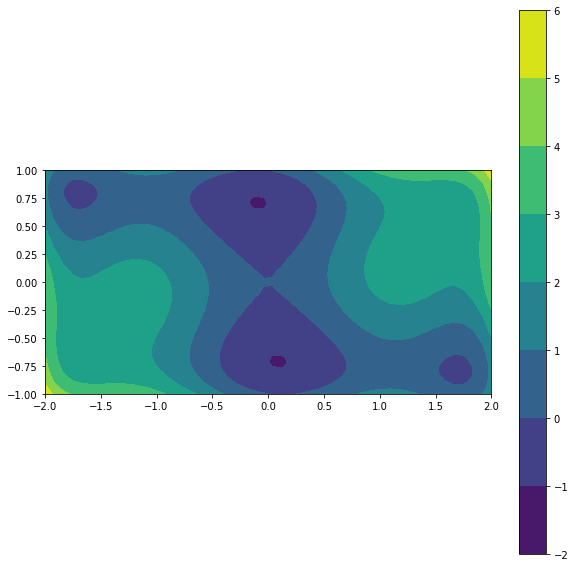

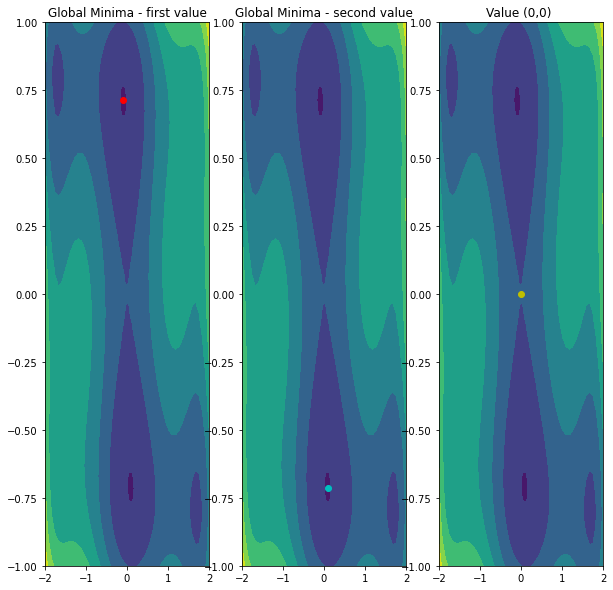

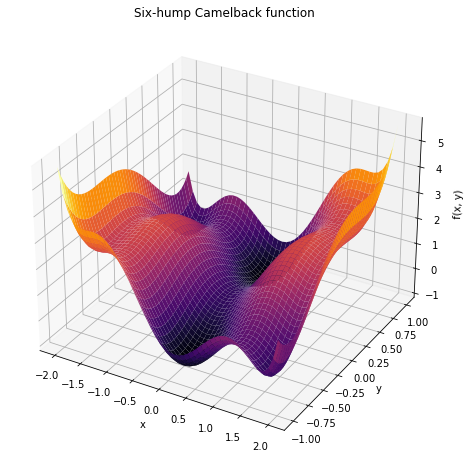

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib as mpl


%matplotlib inline

# def function(paramters):
#     x,y = parameters
#     return (4-(2.1*(x**2))+((x**4)/3))*(x**2)+(x*y)+((4*(y**2))-4)*(y**2)

def function(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

# parameters = []
x = np.linspace(-2, 2)
print(x.shape)
print(x)
y = np.linspace(-1, 1)
print(y.shape)
print(y)
x0 = [0,0]
# x0 = np.asarray(x0)

x_new,y_new = np.meshgrid(x,y)
print(x_new)
print(y_new)
# print("x_new:",x_new,"\n y_new:",y_new)
# print("\n x:",x,"\n y:",y)


plt.figure(figsize=[10, 10])
plt.contourf(x, y, function([x_new, y_new]))
plt.colorbar()
plt.axis('scaled')

fig = plt.figure(figsize=(10,10))
grid_spec =  mpl.gridspec.GridSpec(1,3,width_ratios=[1,1,1], height_ratios=[3])

ax0 = fig.add_subplot(grid_spec[0,0])
ax1 = fig.add_subplot(grid_spec[0,1])
ax2 = fig.add_subplot(grid_spec[0,2])

cont = ax0.contourf(x, y, function([x_new, y_new]))
cont = ax1.contourf(x, y, function([x_new, y_new]))
cont = ax2.contourf(x, y, function([x_new, y_new]))


solution_x = optimize.minimize(function,x0=x)
solution_x_d1 = optimize.minimize(function,x0=[0,2])
solution_x_d2 = optimize.minimize(function, x0 = [0,-2])
# print("\n solution_x:",solution_x)
#it looks like divining gives better results
# if I used the x directly in optimize.minimize, it does not give the
# hess_inv and jac properly, sor I divided it into [0,2] and [0,-2]
print("\n solution_x_d1:",solution_x_d1)
print("\n solution_x_d2:",solution_x_d2)

x_minima = optimize.minimize(function, x0=[0,2])
ax0.scatter(x_minima.x[0], x_minima.x[1], color='r')
ax0.set_title("Global Minima - first value")

x_minima = optimize.minimize(function,x0 = [0,-2])
ax1.scatter(x_minima.x[0], x_minima.x[1], color='c')
ax1.set_title("Global Minima - second value")

x_minima = optimize.minimize(function, x0=[0, 0])
ax2.scatter(x_minima.x[0], x_minima.x[1], color='y')
ax2.set_title("Value (0,0) ")

ax = plt.figure(figsize=[10,8]).add_subplot(projection='3d')
ax.plot_surface(x_new, y_new, function([x_new, y_new]),rstride=1,cstride=1,cmap=plt.cm.inferno)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

# print(parameters[1])
# plt.plot(x, function([x,y]))

# # print("\n\n",function(parameters).shape)
# x_minima = optimize.minimize(function, x0 = [0,0])
# print("\n global minimas:",x_minima.x)

# print(x_minima.x)

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

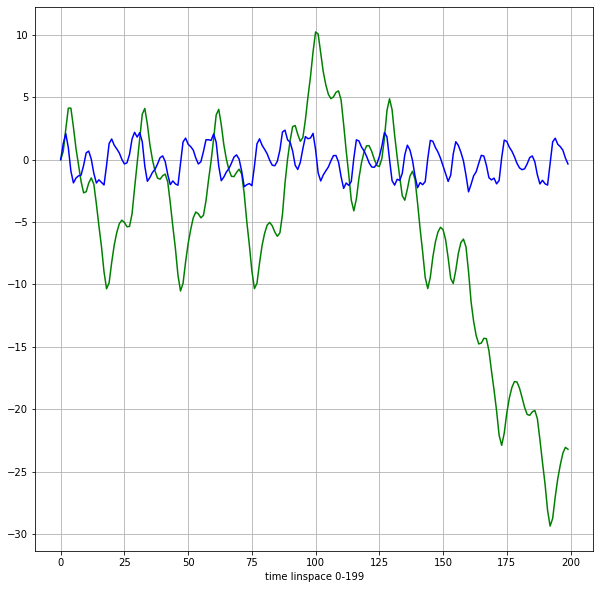

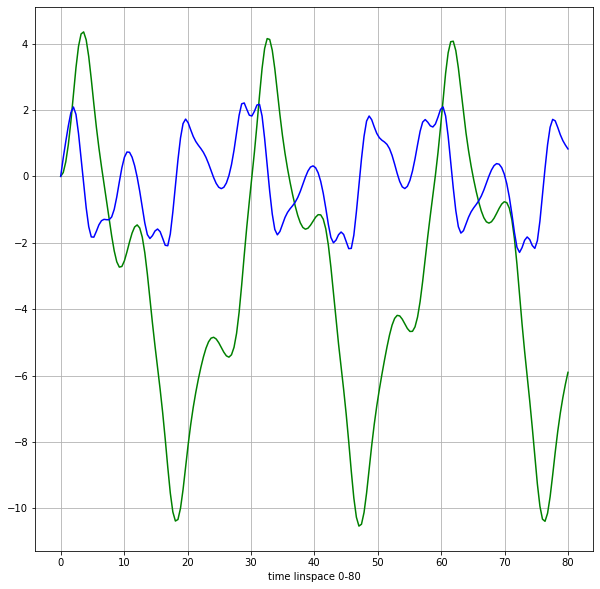

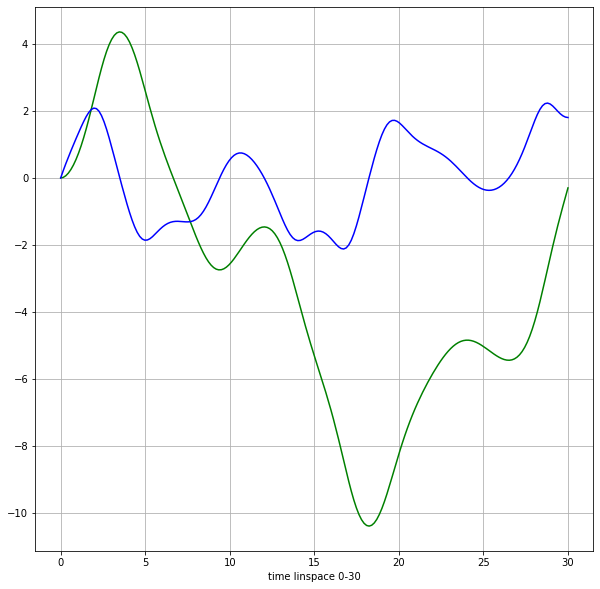

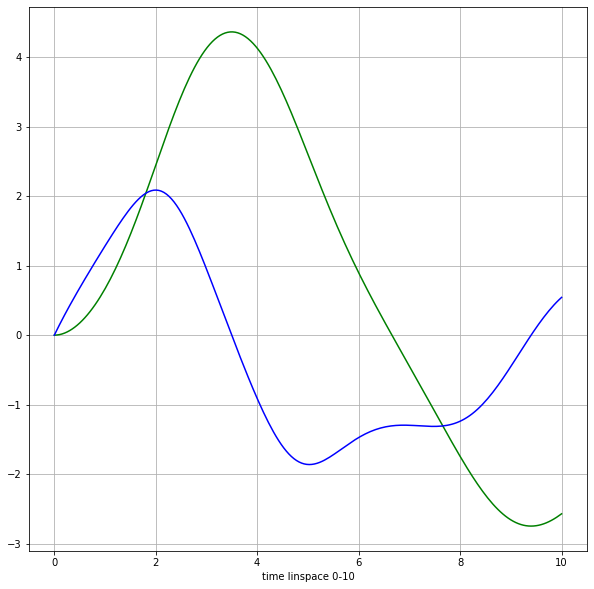

In [28]:
from scipy.integrate import odeint
q = 2.0
d = 1.5
w = 0.65

def equation(y,time,q,d,w):
    theta,omega=y
    return (omega,((-1)*(1/q))*omega+np.sin(theta)+d*np.cos(w*time))



time=np.linspace(0,199,200)
y1 = odeint(equation,y0=(0,0),t=time,args=(q,d,w))
# print(time)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot()
ax0 = plt.plot(time,y1[:,0],'g',label="$theta$")
ax0 = plt.plot(time,y1[:,1],'b',label="$omega$")
ax0 = plt.xlabel('time linspace 0-199')
ax0 = plt.grid()
ax0 = plt.show()

time=np.linspace(0,80,200)
y2 = odeint(equation,y0=(0,0),t=time,args=(q,d,w))
# print(time)
ax1 = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot()
ax1 = plt.plot(time,y2[:,0],'g',label="$theta$")
ax1 = plt.plot(time,y2[:,1],'b',label="$omega$")
ax1 = plt.xlabel('time linspace 0-80')
ax1 = plt.grid()
ax1 = plt.show()

time=np.linspace(0,30,200)
y3 = odeint(equation,y0=(0,0),t=time,args=(q,d,w))
# print(time)
ax2 = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot()
ax2 = plt.plot(time,y3[:,0],'g',label="$theta$")
ax2 = plt.plot(time,y3[:,1],'b',label="$omega$")
ax2 = plt.xlabel('time linspace 0-30')
ax2 = plt.grid()
ax2 = plt.show()

time=np.linspace(0,10,200)
y4 = odeint(equation,y0=(0,0),t=time,args=(q,d,w))
# print(time)
ax3 = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot()
ax3 = plt.plot(time,y4[:,0],'g',label="$theta$")
ax3 = plt.plot(time,y4[:,1],'b',label="$omega$")
ax3 = plt.xlabel('time linspace 0-10')
ax3 = plt.grid()
ax3 = plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


 [        inf  1.          0.5         0.33333333  0.25        0.2
  0.16666667  0.14285714  0.125       0.11111111  0.1        -0.1
 -0.11111111 -0.125      -0.14285714 -0.16666667 -0.2        -0.25
 -0.33333333 -0.5        -1.        ] 


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10. -10.  -9.  -8.
  -7.  -6.  -5.  -4.  -3.  -2.  -1

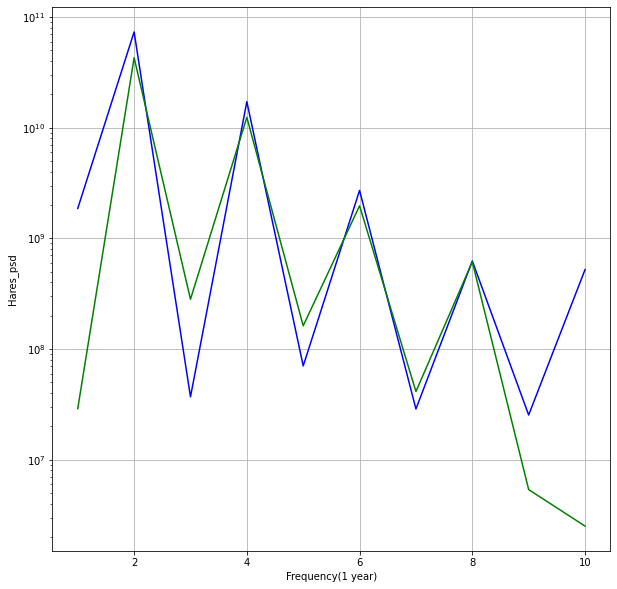

In [89]:
# !wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
import scipy as sp
populations = np.loadtxt('data/populations.txt')
print(populations)
year=populations[:,0]
hare_count=populations[:,1]
lynx_count=populations[:,2]
carrot_count=populations[:,3]

hare_count_fft = sp.fftpack.fft(hare_count)
lynx_count_fft = sp.fftpack.fft(lynx_count)

# power spectral density
hare_count_psd=np.abs(hare_count_fft)**2
lynx_count_psd=np.abs(lynx_count_fft)**2

sample_freq=sp.fftpack.fftfreq(len(lynx_count_psd),1./21)
# periods = 1/sample_freq
print("\n\n",periods,"\n\n")

# print("\n\n",amp_freq,"\n\n")
mask=sample_freq>0
amp_freq=sample_freq[mask]
print(sample_freq)
hare_count_psd_powers=hare_count_psd[mask]



periodss = 1/amp_freq[np.argmax(hare_count_psd_powers)]
print("\n\n period:",periodss,"\n\n")

plt.figure(figsize=(10, 10))
plt.plot(sample_freq[mask], hare_count_psd[mask],'b',label="$hares$")
plt.plot(sample_freq[mask], lynx_count_psd[mask],'g',label="$lynxs$")
plt.xlabel('Frequency(1/2 year)')
plt.ylabel('Hares_psd')
plt.yscale('log')
plt.grid()




#plot the lynx fft
# plt.figure(figsize=(10, 10))
# plt.plot(fft_period[mask], lynx_count_psd[mask])
# plt.xlabel('Frequency(1/2 years)')
# plt.ylabel('Lynx_psd')
# plt.yscale('log')
# plt.grid()







4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

<class 'numpy.ndarray'>
[[0.04705882 0.         0.23921569 ... 0.         0.00392157 0.53333336]
 [0.         0.         0.6784314  ... 0.10196079 0.2901961  0.        ]
 [0.72156864 0.10980392 0.6039216  ... 0.         0.21568628 1.        ]
 ...
 [0.00392157 0.         1.         ... 1.         1.         0.95686275]
 [0.         0.         0.15686275 ... 0.         0.         0.3529412 ]
 [1.         0.52156866 0.04705882 ... 0.         0.         1.        ]]


Text(0.5, 1.0, 'Reconstructed image')

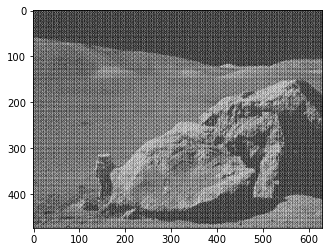

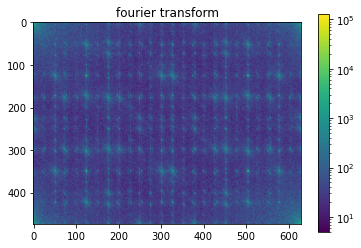

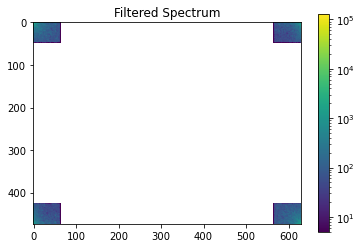

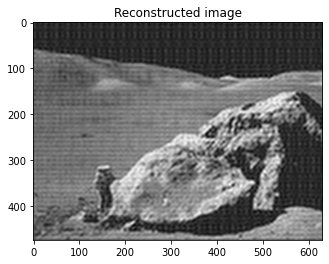

In [84]:
from matplotlib.colors import LogNorm
moonlanding=plt.imread(r"C:\Users\adnan\images\moonlanding.png")

plt.imshow(moonlanding,cmap='gray')
plt.figure()
plt.title('Original image')
print(type(moonlanding))
print(moonlanding)


moonlanding_fft = sp.fftpack.fft2(moonlanding)


plt.imshow(np.abs(moonlanding_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('fourier transform')

fraction = 0.1

moonlanding_fft_copy=moonlanding_fft.copy()

rows,columns = moonlanding_fft_copy.shape

moonlanding_fft_copy[int(rows*fraction):int(rows*(1-fraction))] = 0
moonlanding_fft_copy[:, int(columns*fraction):int(columns*(1-fraction))] = 0

plt.figure()
plt.imshow(np.abs(moonlanding_fft_copy), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

moonlanding_final = sp.fftpack.ifft2(moonlanding_fft_copy).real
plt.figure()
plt.imshow(moonlanding_final,cmap='gray')
plt.title('Reconstructed image')